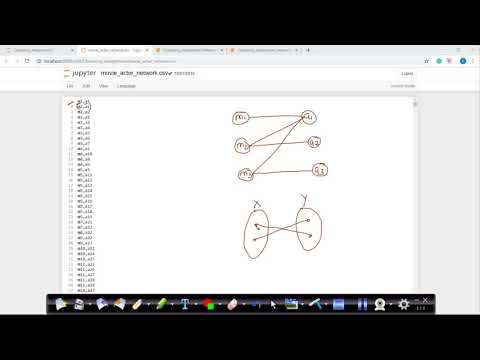

In [ ]:
 from IPython.display import IFrame, YouTubeVideo
YouTubeVideo(id='_XJlZtZqMUs', width=600)

In [ ]:
!pip install StellarGraph

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph
# to install this you need to use "pip install stellargraph"

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clustering_Assignment/movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [ ]:
x = data.values.tolist() # gives a list of the data as list of lists

In [ ]:
edges = [tuple(x) for x in data.values.tolist()]

In [ ]:
B = nx.Graph()
# Adds the first set of data(movie), here it can be in the form of unique list
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
# Adds the second set of data(actor), here it can be in the form of unique list
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
# edges should be in the form of list of tuples, refer the example in the Py docs
B.add_edges_from(edges, label='acted')

In [ ]:
A = list(nx.connected_components(B))[0]

In [ ]:
print("number of nodes", B.number_of_nodes())
print("number of edges", B.number_of_edges())

number of nodes 4703
number of edges 9650


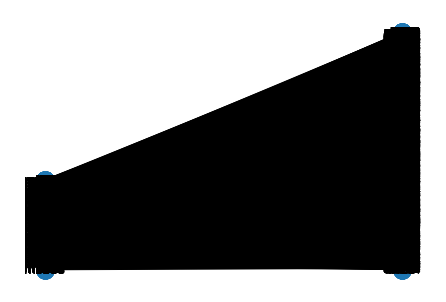

In [ ]:
l, r = nx.bipartite.sets(B)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(B, pos=pos, with_labels=True)
plt.show()

In [ ]:
movies = []
actors = []
# Just to see the nodes/vertices how they split in two bipartite sets
# Summation will be equal to total number of nodes again
for i in B.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [ ]:

# Create the random walker from set A to set B
rw = UniformRandomMetaPathWalk(StellarGraph(B))

# specify the metapath schemas as a list of lists of node types.
# As it is bipartite graph, walking among the same set is prohibited

metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(B.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )
# This length would be equal to number of nodes(as given n=1) because from every node, random walk is taken as per the metapaths provided
# output would be 4703x100, as 100 is the maximum length of the walk can do randomly

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [ ]:
from gensim.models import Word2Vec
# word2vec uses CBOW method by default 
# For generating a single vector after finding 128(given size=128) individual vectors for each word in the Corpus
model = Word2Vec(walks, size=128, window=5)

In [ ]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [ ]:
print(list(model.wv.vocab.keys())) # each vector will be formed as a dictionary with key as ID and value as the vector

['m1', 'a1', 'm4', 'a8', 'a10', 'a9', 'm2', 'a2', 'm5', 'a17', 'a14', 'm1157', 'a904', 'm1156', 'a1037', 'm636', 'a1004', 'm287', 'a968', 'm648', 'm1082', 'a973', 'm320', 'm537', 'a970', 'm701', 'a1028', 'm706', 'a1033', 'a1026', 'm933', 'a1384', 'm834', 'a992', 'm830', 'a1912', 'a1911', 'm1181', 'a3290', 'a3292', 'a792', 'm194', 'a820', 'm189', 'a848', 'a768', 'm215', 'a803', 'm203', 'm188', 'a773', 'a16', 'a18', 'm212', 'm201', 'a440', 'm390', 'm423', 'a1076', 'm386', 'a1165', 'a1164', 'm396', 'a1213', 'a1209', 'a1212', 'a854', 'm411', 'a1176', 'm388', 'm398', 'a1216', 'a1181', 'm397', 'm836', 'm1376', 'a3668', 'a621', 'a3670', 'a962', 'm682', 'm296', 'm721', 'a782', 'm1084', 'a306', 'm1043', 'a969', 'm245', 'a988', 'm677', 'a1063', 'm1349', 'a1716', 'm973', 'a2139', 'm949', 'a2308', 'a1835', 'a2309', 'm948', 'a2305', 'm3', 'a5', 'a6', 'm1177', 'a2262', 'm937', 'a2083', 'm897', 'a2089', 'a2087', 'm913', 'a2165', 'a2167', 'a2166', 'a1442', 'm467', 'm463', 'm466', 'm465', 'a1436', 'm46

In [ ]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
print(node_ids[0:15])
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ B.nodes[node_id]['label'] for node_id in node_ids]

# B.nodes[node_id]['label'] in line 5 --> This can be replaced with simple if-else as before to know actor or movie vector

['a973', 'a967', 'a964', 'a1731', 'a970', 'a969', 'a1028', 'a1003', 'a1057', 'a965', 'm1094', 'm1111', 'm67', 'a959', 'a49']


In [ ]:
from sklearn.manifold import TSNE
transform = TSNE #PCA
trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

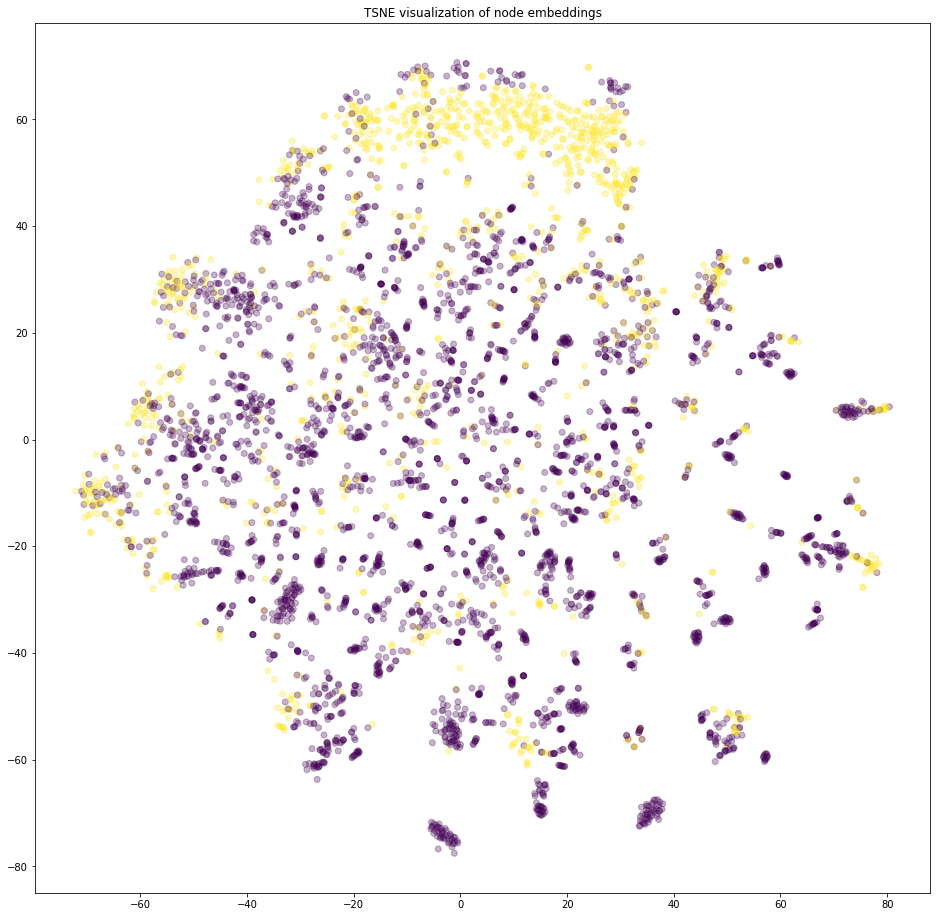

In [ ]:
import numpy as np
# draw the points

## Here just we are giving colors appropriately, nothing more than that

# label_map: gives a dictionary like {0:actor,1:movie}
# So as there are only 2 types, 2 colors are enough
label_map = { l: i for i, l in enumerate(np.unique(node_targets))}

# As we have formed already the 4703x128 dimensional vector, each row will refer to either movie or actor
# So, we are forming a list with 0 & 1 to make color difference in the plot below 
node_colours = [ label_map[target] for target in node_targets]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
# plot.scatter(1st component, 2nd component) in layman terms
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('TSNE visualization of node embeddings')
plt.show()